# Week 6 Homework 5 (Due on Monday, March 9 at 11:59PM)

Apply multilinear regression model on the advertising data used in the previous notebook. Train the model in two ways:


1. Use `LinearRegression` class from `sklearn.linear_model`.

2. Use the normal equation.


Split the data into 80% training data and 20% test data. Show the paramter values and the MSEs on the training set and the test set (Hint: use either the formula given in class today or use `mean_squared_error` function from `sklearn.metrics`)

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [136]:
url = "http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [137]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [138]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Correlation Coefficient**

In [139]:
data = advertising[['TV', 'radio', 'newspaper', 'sales']]
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [140]:
# Correlation coefficient between TV and sales 
print(np.corrcoef(data['TV'], data['sales'])[0, 1])

# Correlation coefficient between radio and sales
print(np.corrcoef(data['radio'], data['sales'])[0, 1])

# Correlation coefficient between newspaper and sales
print(np.corrcoef(data['newspaper'], data['sales'])[0, 1])

0.7822244248616061
0.5762225745710551
0.22829902637616528


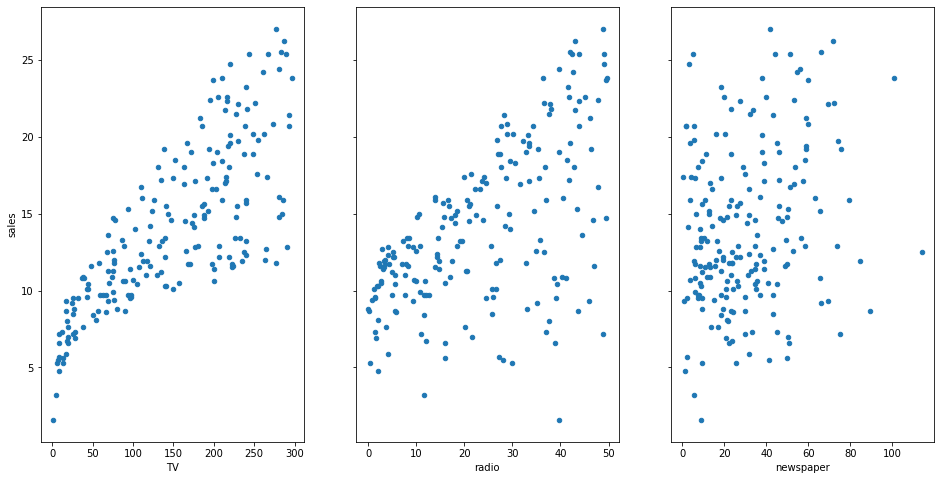

In [169]:
fig,axs= plt.subplots(1,3,sharey=True) # sharey = shares same y axis across the plot for each x axis
data.plot(kind="scatter",x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind="scatter",x='radio',y='sales',ax=axs[1],figsize=(16,8))
data.plot(kind="scatter",x='newspaper',y='sales',ax=axs[2],figsize=(16,8))

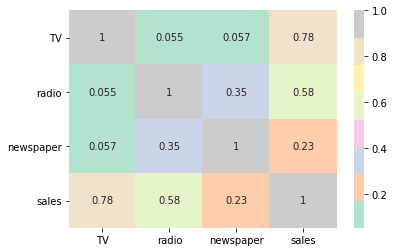

In [141]:
# Correlation between different variables
sns.heatmap(advertising.corr(), cmap="Pastel2", annot = True)

### **Multilinear Regression: Normal equation**

In [142]:
# Construct matrix X using np.hstack(), np.ones()
X = np.hstack([np.ones([m, 1]), data[['TV', 'radio', 'newspaper']].values])
print(X)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]
 [  1.    8.7  48.9  75. ]
 [  1.   57.5  32.8  23.5]
 [  1.  120.2  19.6  11.6]
 [  1.    8.6   2.1   1. ]
 [  1.  199.8   2.6  21.2]
 [  1.   66.1   5.8  24.2]
 [  1.  214.7  24.    4. ]
 [  1.   23.8  35.1  65.9]
 [  1.   97.5   7.6   7.2]
 [  1.  204.1  32.9  46. ]
 [  1.  195.4  47.7  52.9]
 [  1.   67.8  36.6 114. ]
 [  1.  281.4  39.6  55.8]
 [  1.   69.2  20.5  18.3]
 [  1.  147.3  23.9  19.1]
 [  1.  218.4  27.7  53.4]
 [  1.  237.4   5.1  23.5]
 [  1.   13.2  15.9  49.6]
 [  1.  228.3  16.9  26.2]
 [  1.   62.3  12.6  18.3]
 [  1.  262.9   3.5  19.5]
 [  1.  142.9  29.3  12.6]
 [  1.  240.1  16.7  22.9]
 [  1.  248.8  27.1  22.9]
 [  1.   70.6  16.   40.8]
 [  1.  292.9  28.3  43.2]
 [  1.  112.9  17.4  38.6]
 [  1.   97.2   1.5  30. ]
 [  1.  265.6  20.    0.3]
 [  1.   95.7   1.4   7.4]
 [  1.  290.7   4.1   8.5]
 [  1.  266.9  43.8   5. ]
 

In [143]:
# Construct vector y
y = data[['sales']].values
print(y)

[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [10.6]
 [ 8.6]
 [17.4]
 [ 9.2]
 [ 9.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [12.5]
 [ 5.6]
 [15.5]
 [ 9.7]
 [12. ]
 [15. ]
 [15.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [ 9.6]
 [17.4]
 [ 9.5]
 [12.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [12.9]
 [ 8.5]
 [14.9]
 [10.6]
 [23.2]
 [14.8]
 [ 9.7]
 [11.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [15.7]
 [14. ]
 [18. ]
 [ 9.3]
 [ 9.5]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [12.3]
 [11.3]
 [13.6]
 [21.7]
 [15.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [11.2]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [11.7]
 [15.5]
 [25.4]
 [17.2]
 [11.7]
 [23.8]
 [14.8]
 [14.7]
 [20.7]
 [19.2]
 [ 7.2]
 [ 8.7]
 [ 5.3]
 [19.8]
 [13.4]
 [21.8]
 [14.1]
 [15.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [11.6]
 [15.2]
 [19.7]


In [144]:
# Apply the normal equation to find theta
num = X.T.dot(X)
theta = np.linalg.inv(num).dot(X.T.dot(y))
print(theta)

[[ 2.93888937e+00]
 [ 4.57646455e-02]
 [ 1.88530017e-01]
 [-1.03749304e-03]]


#### MSE

In [147]:
def get_squared_error(data, name, theta):
    # Extract x and y from data
    x = data.loc[name, ['TV', 'radio', 'newspaper']].values
    y = data.loc[name, ['sales']].values
    # Calculate prediction
    prediction = theta[0] + theta[1]*x[0] + theta[2]*x[1]
    # Calculate the squared error
    squared_error = (prediction - y)**2
    return squared_error

In [148]:
# Calculate the average.
all_errors = [get_squared_error(data, name, theta) for name in data.index]
mse = np.mean(all_errors) # mean squared error
rmse = np.sqrt(mse) # root mean squared error
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 2.785639165659185
RMSE: 1.6690234167498024


### **LinearRegression class from sklearn.linear_model**

In [149]:
# Build a linear regression model using LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[['TV', 'radio', 'newspaper']], data['sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
# The coef_ and intercept_ attributes contain parameter values
print(lr.coef_)
print(lr.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594085


### Train-Test-Split

In [152]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data['sales']

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [154]:
X_train.head()

,TV,radio,newspaper
169,215.4,23.6,57.6
113,175.7,15.4,2.4
172,164.5,20.9,47.4
182,218.5,5.4,27.4
8,120.2,19.6,11.6


In [156]:
y_train.head()

169    17.1
113    14.1
172    14.5
182    12.2
8      13.2
Name: sales, dtype: float64

In [159]:
# Building Linear Model using statsmodel.api
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS' -> Ordinary Least Squares regression (OLS)
# OLS is more commonly named linear regression
lr = sm.OLS(y_train, X_train_sm).fit()

In [160]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const        2.817275
TV           0.045586
radio        0.185698
newspaper    0.002233
dtype: float64

In [115]:
# Performing a summary operation 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     427.4
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           5.38e-75
Time:                        21:12:05   Log-Likelihood:                -316.74
No. Observations:                 160   AIC:                             641.5
Df Residuals:                     156   BIC:                             653.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8173      0.357      7.881      0.0

### Model Evaluation

In [117]:
# Distribution of the error terms
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

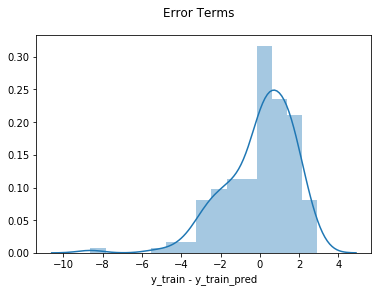

In [118]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms')                  # plot heading 
plt.xlabel('y_train - y_train_pred')         # X-label
plt.show()

### Predictions on the Test Set

In [120]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [121]:
y_pred.head()

127    10.509488
105    20.057236
100    16.826655
93     19.094058
112    20.943838
dtype: float64

#### MSE

In [163]:
# Returns the mean squared error (square root)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

1.3165457764851047

#### R-squared
- R-squared represents the goodness of fit of a regression model. The closer the value of r-square to 1, the better is the model fitted.

In [164]:
# Checking the R-squared on the test set
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.9184369032278499

**In conclusion, the value of r-square is close to 1 (or 100% when converted from 0.918 to 91.8%), therefore the model has a good fit.**